In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from scipy import stats

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
X_train = train_data.drop('Crop', axis=1)
y_train = train_data['Crop']
X_test = test_data.drop('Crop', axis=1)
y_test = test_data['Crop']

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

dt = DecisionTreeClassifier(random_state=42)

cross_val_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.98381877 0.98376623 0.99025974 0.98376623 0.97402597]
Mean Cross-Validation Score: 0.9831273904089437


In [6]:
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(dt, pd.concat([X_train_scaled_df, X_test_scaled_df]), pd.concat([y_train, y_test]), cv=5)

print(f'Accuracy: {accuracy}')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print(classification_report(y_test, y_pred))

Accuracy: 0.9896373056994818
Cross-validation scores: [0.99222798 0.98186528 0.98181818 0.97922078 0.98961039]
Mean CV accuracy: 0.9849485229796111
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        30
           6       1.00      0.94      0.97        18
           8       0.88      0.94      0.91        16
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        14
          11       0.93      1.00      0.97        14
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.

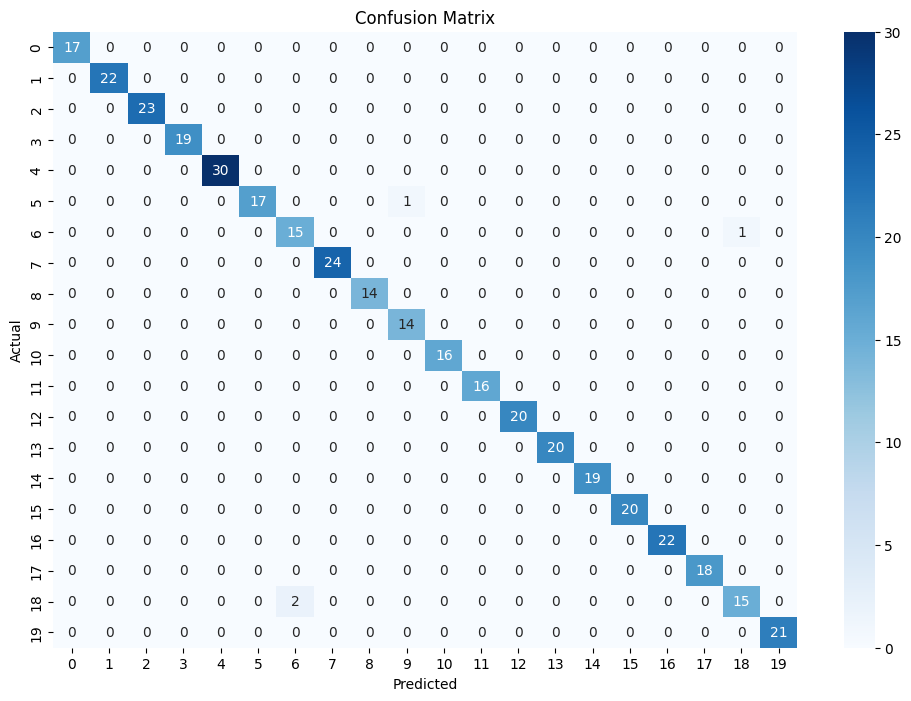

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()